Import Libraries & Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
iris = load_iris()

wine = load_wine()
#print('data:\n',wine['data'])
#print('target:\n',wine['target'])
#print('The names of the dataset columns:\n',wine['feature_names'])

x = wine.data
y = wine.target
df=pd.DataFrame(x,y)
print(df.head(),'\n')
print('(datapoints,features)',df.shape)
print(x.shape[1])

      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
0  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
0  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
0  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
0  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
0  1050.0  
0  1185.0  
0  1480.0  
0   735.0   

(datapoints,features) (178, 13)
13


Standardize the Dataset

Z = (x - µ)/σ

In [39]:
mean = np.mean(x,axis=0)
std = np.std(x,axis=0)
print('mean:\n',mean[:4])
print('std dev.:\n',std[:4])
standard_x= (x-mean)/std
print('stdndardized x:\n',standard_x[:1])
print(standard_x.shape)

mean:
 [13.00061798  2.33634831  2.36651685 19.49494382]
std dev.:
 [0.80954291 1.11400363 0.27357229 3.33016976]
stdndardized x:
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]]
(178, 13)


Find the covariance matrix

In [6]:
cov_matrix=np.dot(standard_x.T,standard_x)/(x.shape[0]-1)
#print('Covariance matrix:',cov_matrix)
print("Covariance matrix:", cov_matrix.shape)


Covariance matrix: (13, 13)


Calculate eigenvalues and eigen vectors

In [16]:
eigenvalues, eigenvectors=np.linalg.eig(cov_matrix)
print("eigenvalues:",np.round(eigenvalues,2))
#print("eigenvectors:",np.round(eigenvectors,2))

eigenvalues: [4.73 2.51 1.45 0.92 0.86 0.65 0.55 0.1  0.35 0.17 0.29 0.23 0.25]


Sort eigenvalues and their corresponding eigenvectors(high --> low)

In [20]:
i = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[i]
eigenvectors = eigenvectors[:, i]
print("Sorted eigenvalues:",np.round(eigenvalues,2))
print("Sorted eigenvectors:",np.round(eigenvectors,2))

Sorted eigenvalues: [4.73 2.51 1.45 0.92 0.86 0.65 0.55 0.35 0.29 0.25 0.23 0.17 0.1 ]
Sorted eigenvectors: [[-0.14  0.48  0.21 -0.02 -0.27  0.21  0.06  0.4  -0.51  0.21 -0.23 -0.27
  -0.01]
 [ 0.25  0.22 -0.09  0.54  0.04  0.54 -0.42  0.07  0.08 -0.31  0.08  0.12
  -0.03]
 [ 0.    0.32 -0.63 -0.21 -0.14  0.15  0.15 -0.17  0.31 -0.03 -0.5  -0.05
   0.14]
 [ 0.24 -0.01 -0.61  0.06  0.07 -0.1   0.29  0.43 -0.2   0.05  0.48 -0.06
  -0.09]
 [-0.14  0.3  -0.13 -0.35  0.73  0.04 -0.32 -0.16 -0.27  0.07  0.07  0.06
  -0.06]
 [-0.39  0.07 -0.15  0.2  -0.15 -0.08  0.03 -0.41 -0.29 -0.32  0.3  -0.3
   0.46]
 [-0.42 -0.   -0.15  0.15 -0.11 -0.02  0.06 -0.19 -0.05 -0.16 -0.03 -0.04
  -0.83]
 [ 0.3   0.03 -0.17 -0.2  -0.5  -0.26 -0.6  -0.23 -0.2   0.22  0.12  0.04
  -0.11]
 [-0.31  0.04 -0.15  0.4   0.14 -0.53 -0.37  0.37  0.21  0.13 -0.24 -0.1
   0.12]
 [ 0.09  0.53  0.14  0.07 -0.08 -0.42  0.23 -0.03 -0.06 -0.29  0.03  0.6
   0.01]
 [-0.3  -0.28 -0.09 -0.43 -0.17  0.11 -0.23  0.44 -0.09 -0.52 -0.

Feature Selection (Pick 'm' eigenvalues and form a matrix of eigenvectors)

In [66]:
m = 2
print(eigenvectors[:,:m].shape)
print("Top 2 Eigenvectors:\n", np.round(eigenvectors[:, :m], 2))


(13, 2)
Top 2 Eigenvectors:
 [[-0.14  0.48]
 [ 0.25  0.22]
 [ 0.    0.32]
 [ 0.24 -0.01]
 [-0.14  0.3 ]
 [-0.39  0.07]
 [-0.42 -0.  ]
 [ 0.3   0.03]
 [-0.31  0.04]
 [ 0.09  0.53]
 [-0.3  -0.28]
 [-0.38 -0.16]
 [-0.29  0.36]]


Projection of Data

In [61]:
pca=np.dot(standard_x, eigenvectors[:,:m])
print("PCA Matrix Dimensions:",pca.shape)
print("Projected Data:\n",pca[:5])

PCA Matrix Dimensions: (178, 4)
Projected Data:
 [[-3.31675081  1.44346263  0.16573904 -0.21563119]
 [-2.20946492 -0.33339289  2.02645737 -0.29135832]
 [-2.51674015  1.0311513  -0.98281867  0.72490231]
 [-3.75706561  2.75637191  0.17619184  0.56798331]
 [-1.00890849  0.86983082 -2.02668822 -0.40976579]]


PCA using sklearn library

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)  # standardization (mean=0, std=1)
pca_sk = PCA(n_components=2)
pca_sklearn = pca_sk.fit_transform(X_std)
print(pca_sklearn[:5])

[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]]


Visulalization

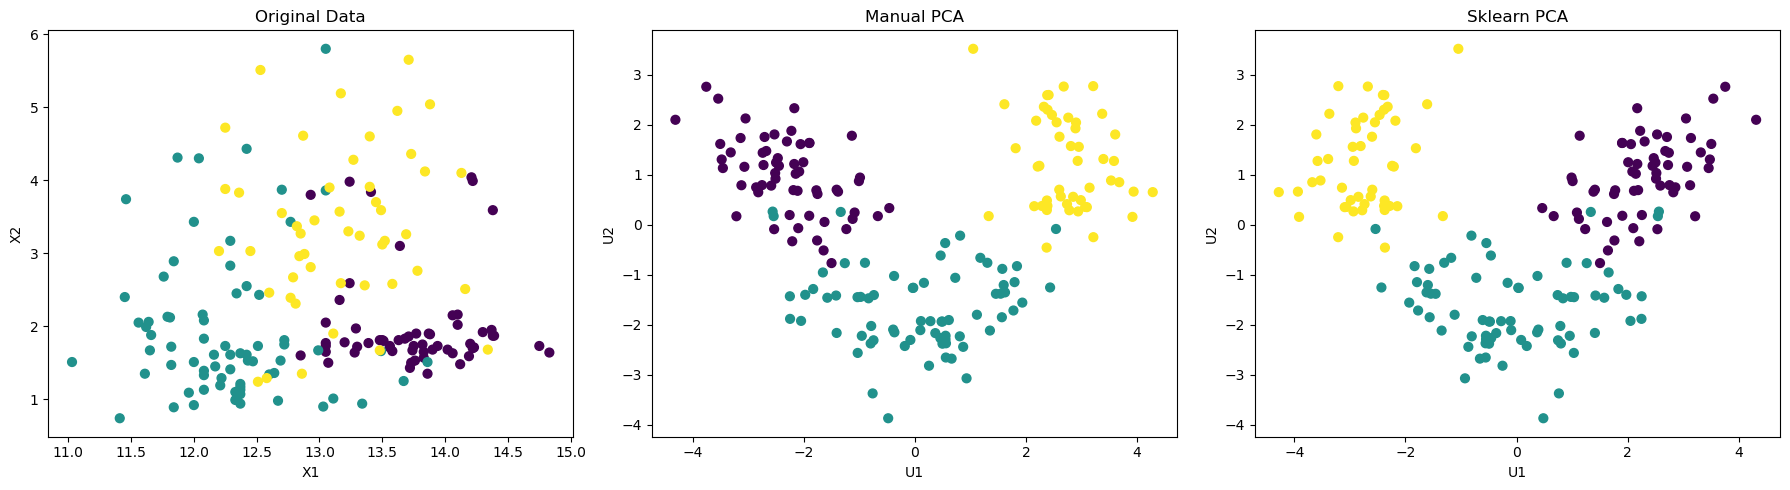

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Before PCA 
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', s=40)
axes[0].set_title("Original Data")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

# Manual PCA
axes[1].scatter(pca[:, 0], pca[:, 1], c=y, cmap='viridis', s=40)
axes[1].set_title("Manual PCA")
axes[1].set_xlabel("U1")
axes[1].set_ylabel("U2")

# Sklearn PCA
axes[2].scatter(pca_sklearn[:, 0], pca_sklearn[:, 1], c=y, cmap='viridis', s=40)
axes[2].set_title("Sklearn PCA")
axes[2].set_xlabel("U1")
axes[2].set_ylabel("U2")

plt.tight_layout()
plt.show()
